In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [5]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)
data = pd.read_csv('data/cancer_reg.csv',encoding='cp1252')
print(data.shape)
data.head()

(3047, 34)


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [ ]:
data = data.drop(['Geography'],axis=1)
data = data.drop(['binnedInc'],axis=1)
print(data.shape)
data = data.fillna(value=0) 

(3047, 32)


In [4]:
data.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,41.7,2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,0.0,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,33.7,2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,45.8,2.62,54.2,24.0,36.6,0.0,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,43.4,2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,48.9,2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


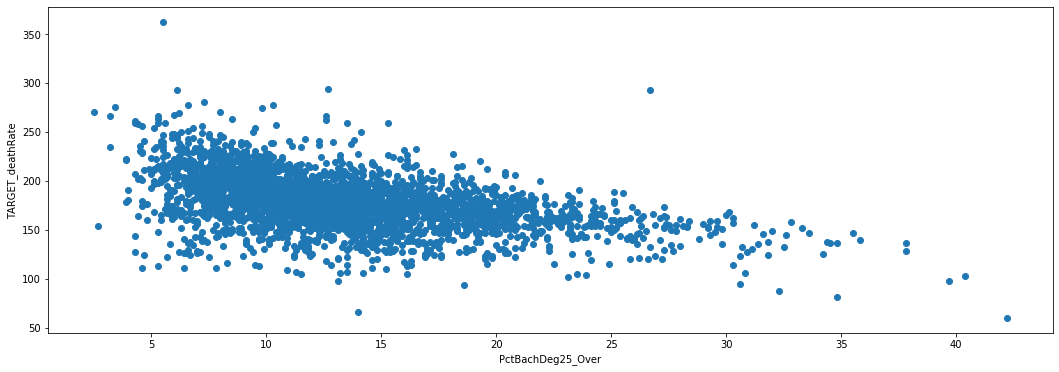

In [ ]:
#PLOTTING:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))
plt.xlabel("PctBachDeg25_Over") 
plt.ylabel("TARGET_deathRate")
plt.scatter(data['PctBachDeg25_Over'],data['TARGET_deathRate'])

In [ ]:
def remove_outliers(data, k=3):
    mu       = data.mean()
    sigma    = data.std()
    filtered = data[(mu - k*sigma < data) & (data < mu + k*sigma)]
    return filtered

In [ ]:
data = data.apply(remove_outliers)
data = data.dropna()
print(data.shape)
data.head()

(2329, 32)


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469.0,164.9,489.8,61898.0,260131.0,11.2,499.748204,39.3,36.9,41.7,2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,0.0,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70.0,161.3,411.6,48127.0,43269.0,18.6,23.111234,33.0,32.2,33.7,2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50.0,174.7,349.7,49348.0,21026.0,14.6,47.560164,45.0,44.0,45.8,2.62,54.2,24.0,36.6,0.0,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202.0,194.8,430.4,44243.0,75882.0,17.1,342.637253,42.8,42.2,43.4,2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26.0,144.4,350.1,49955.0,10321.0,12.5,0.000000,48.3,47.8,48.9,2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


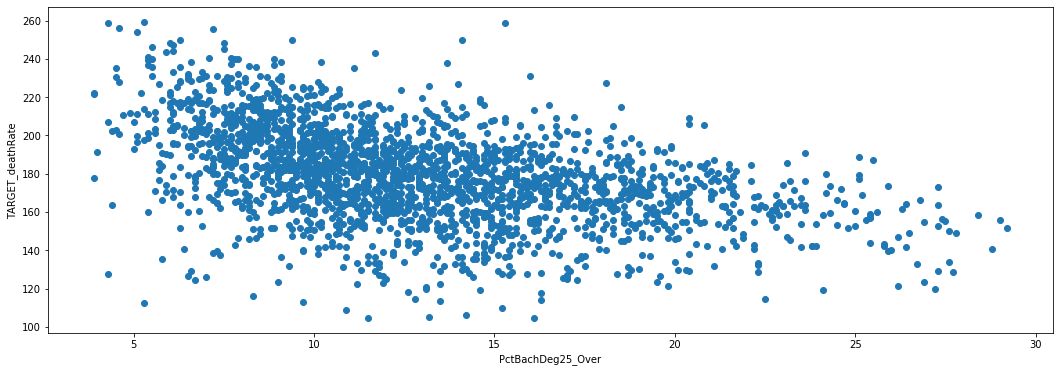

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))
plt.xlabel("PctBachDeg25_Over")
plt.ylabel("TARGET_deathRate")
plt.scatter(data['PctBachDeg25_Over'],data['TARGET_deathRate'])

In [ ]:
data.shape

(2329, 32)

2329
2328


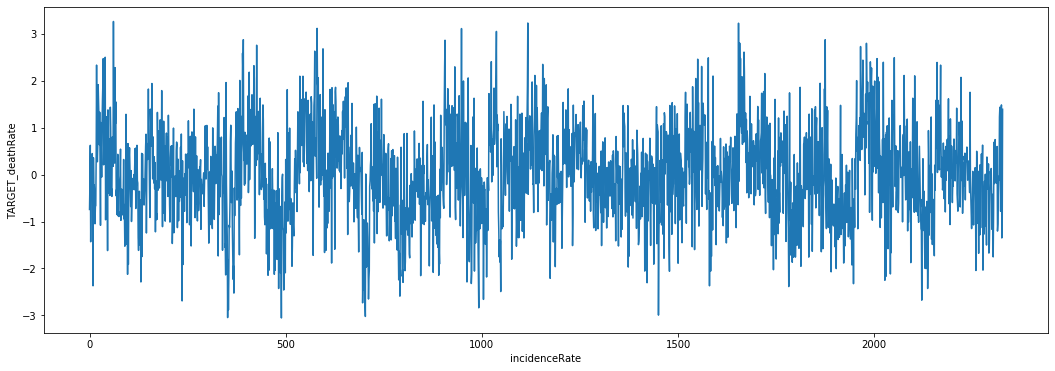

In [ ]:
import matplotlib.pyplot as plt
from numpy.fft import *
import numpy
plt.figure(figsize=(18, 6))
plt.xlabel("incidenceRate")
plt.ylabel("TARGET_deathRate")
x = data['TARGET_deathRate']
fourier = rfft(x)
frequencies = rfftfreq(data.shape[0], d=20e-3/data.shape[0])
fourier[frequencies > 1e3] = 0
print(data.shape[0])
x = irfft(fourier)
print(len(x))
plt.plot(numpy.arange(len(x)), (data['TARGET_deathRate'][1:] - numpy.mean(data['TARGET_deathRate'][1:])) / numpy.std(data['TARGET_deathRate'][1:]))

In [11]:
data[data.TARGET_deathRate > 350].shape ### 

(0, 32)

In [ ]:
%%time

Wall time: 0 ns


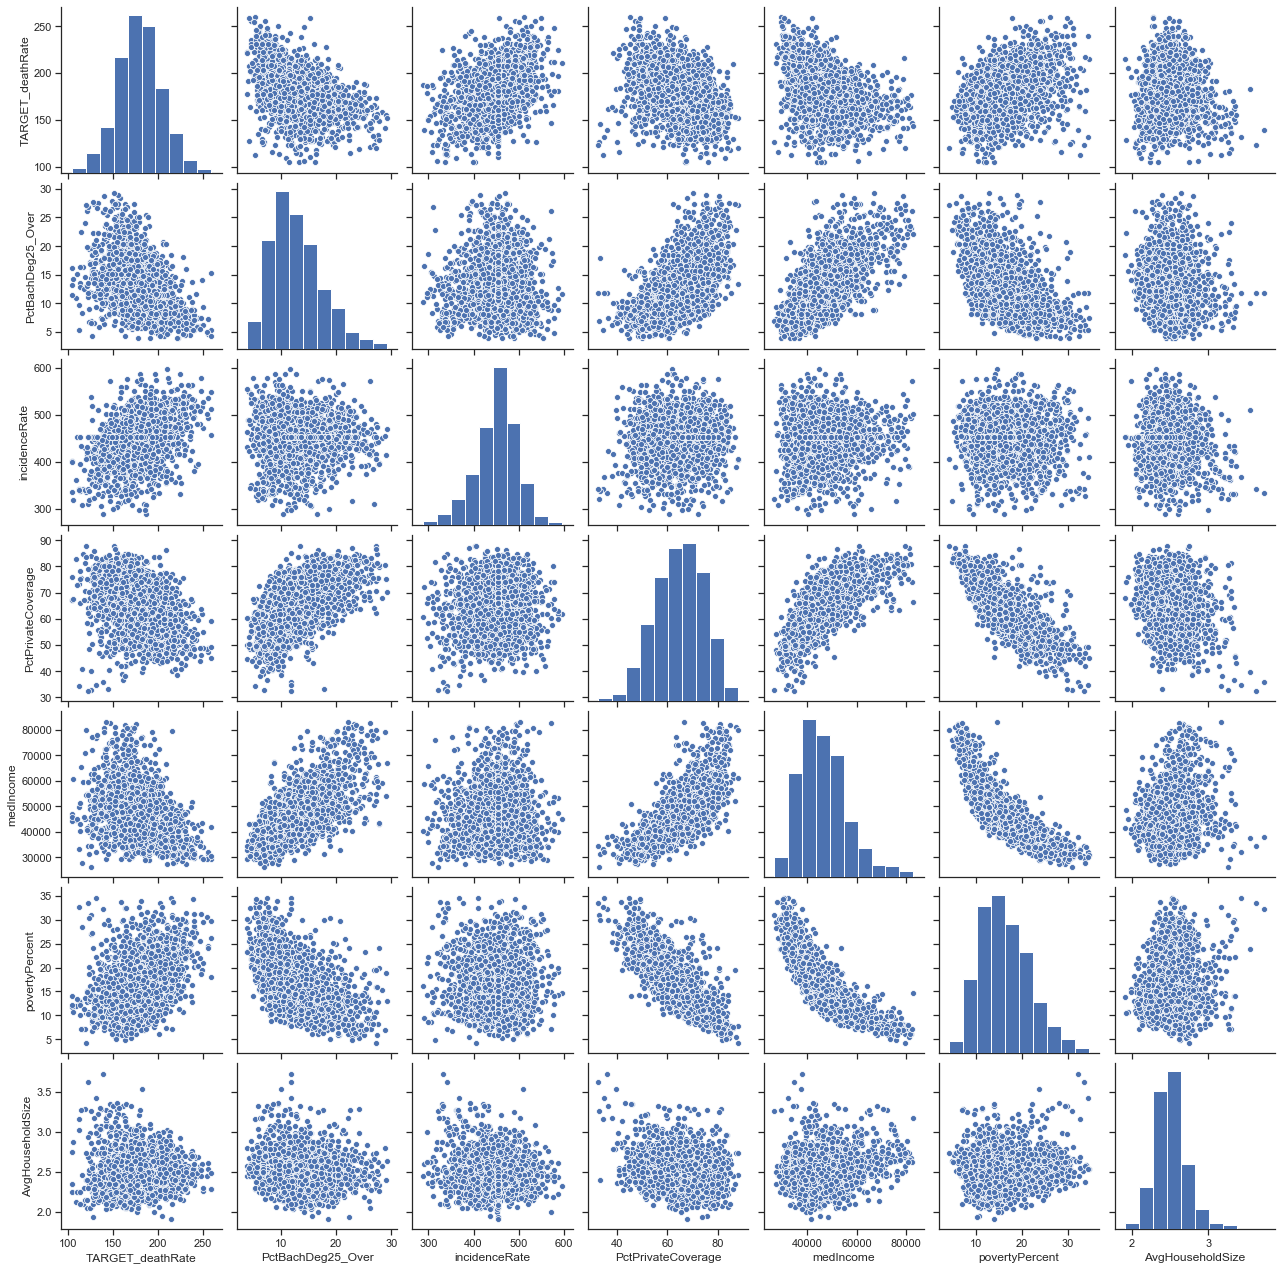

Wall time: 12.6 s


In [ ]:
%%time
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, vars=["TARGET_deathRate", "PctBachDeg25_Over", "incidenceRate", 
                             "PctPrivateCoverage", "medIncome", "povertyPercent", "AvgHouseholdSize"])
plt.show() 

Wall time: 642 ms


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5]),
 <a list of 32 Text xticklabel objects>)

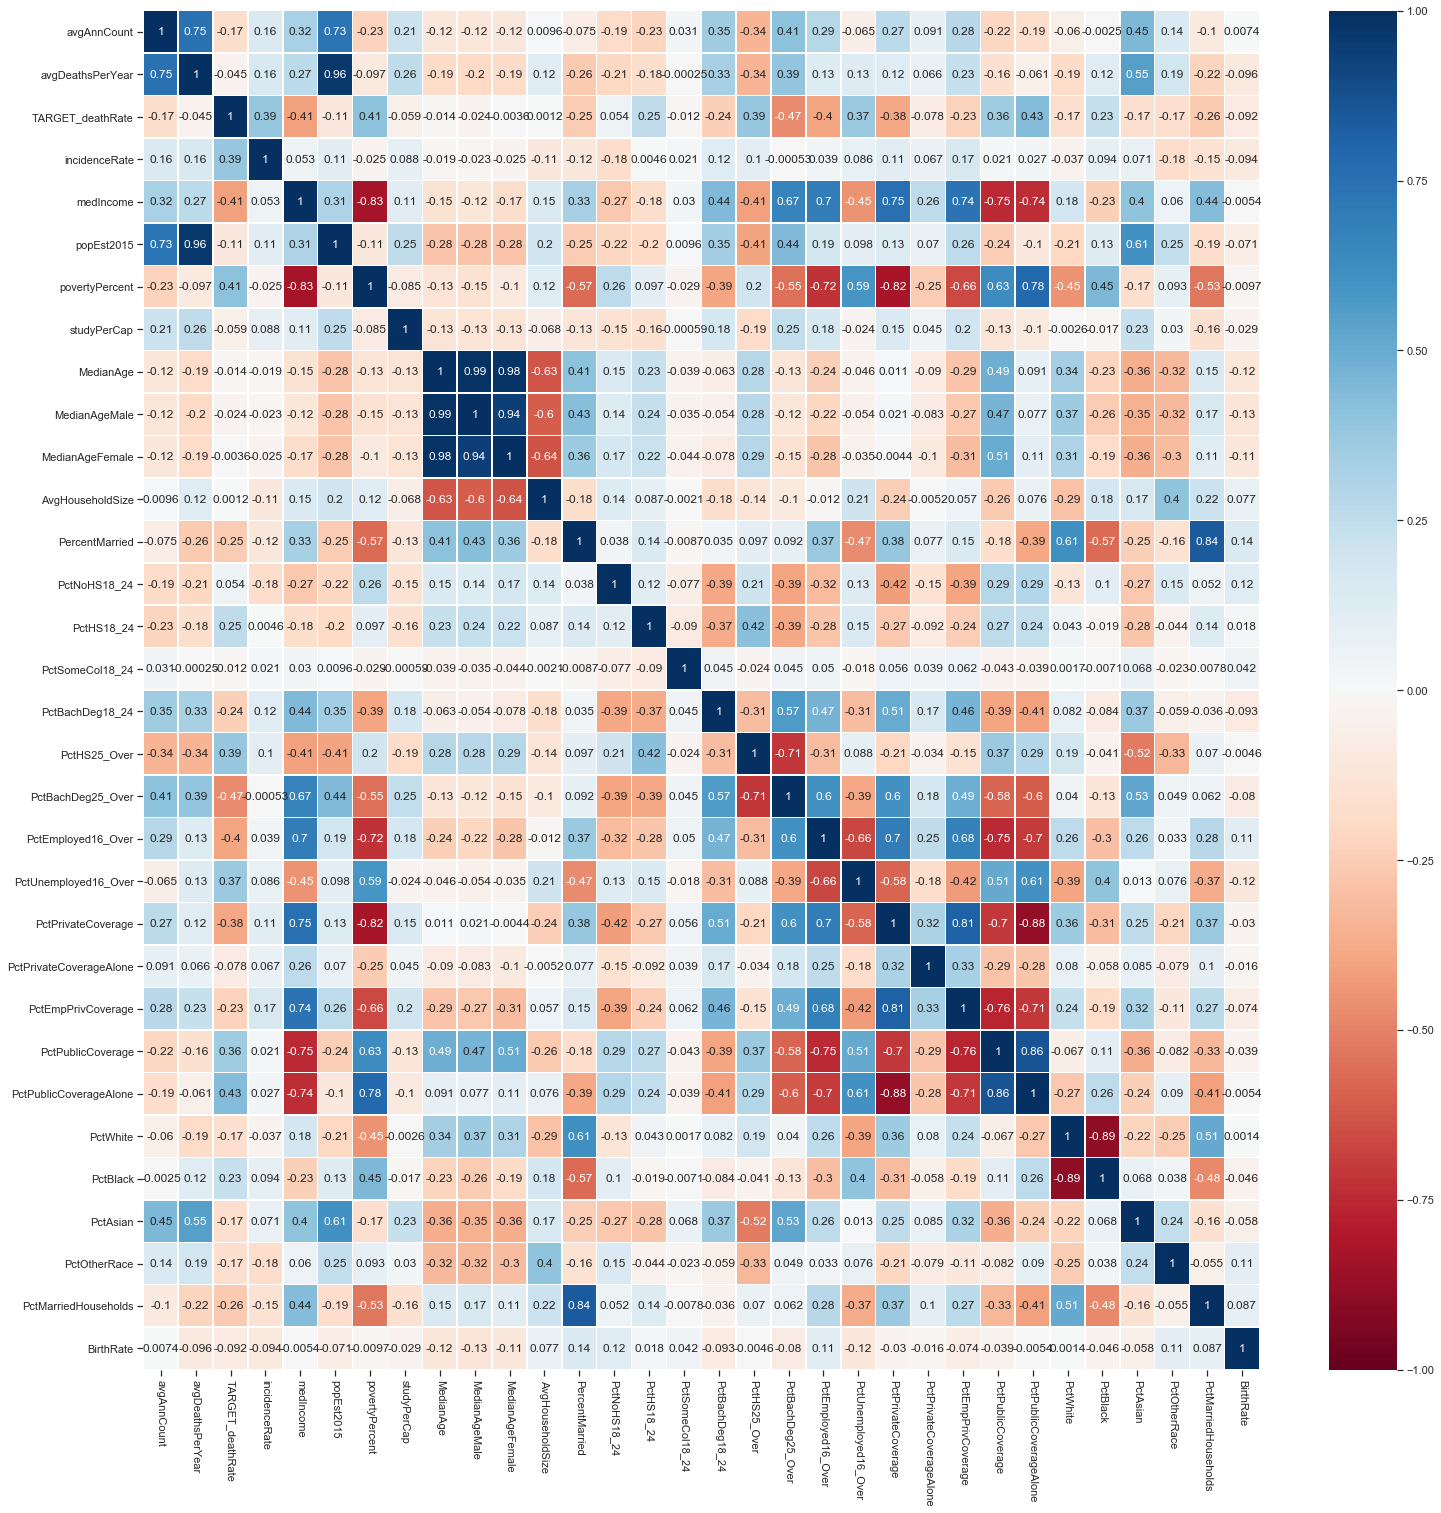

In [ ]:
%%time
corrmat = data.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corrmat, 
            linewidths=0.5, 
            cmap="RdBu", 
            vmin=-1, 
            vmax=1, 
            annot=True)
plt.xticks(rotation=270)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

data_df = data.copy()
data_df.shape

(2329, 32)

In [ ]:
data = pd.DataFrame(
                    scaler.fit_transform(data), 
                    columns = data.columns, 
                    index = data.index)
data.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1.328637,1.545255,-0.594825,0.852749,1.564352,1.615590,-0.962711,1.682193,-0.400131,-0.628210,-0.176384,0.147314,-0.010956,-0.905202,0.481493,1.782467,0.290635,-1.924141,1.452733,-0.320797,0.132013,1.077721,-1.871203,0.025341,-0.492014,-0.939342,-0.361298,-0.439646,3.355617,0.149790,0.185783,0.330091
1,-0.430031,-0.311191,-0.741673,-0.826116,0.163016,-0.212578,0.406634,-0.312706,-1.702858,-1.593344,-1.814495,-0.795769,-1.406235,-1.654015,-1.548906,2.995685,0.457459,-1.489150,2.121375,0.208533,0.064365,0.563342,0.704138,0.254144,-0.745128,-0.697259,0.234392,-0.580707,1.144632,1.096352,-1.191902,-0.722117
2,-0.532045,-0.404246,-0.195071,-2.155038,0.287265,-0.400089,-0.333553,-0.210378,0.778527,0.829758,0.663148,0.524547,0.285541,0.828162,0.137157,-0.549792,1.013540,-1.023088,0.676246,-1.114792,-0.206225,-0.118998,0.211089,-0.741147,0.801677,0.382807,0.369853,-0.600615,-0.383655,0.600599,0.478271,-1.077781
3,-0.065079,0.302972,0.624832,-0.422502,-0.232220,0.062352,0.129064,1.024627,0.323606,0.460132,0.171715,0.053005,0.023926,0.301220,0.683346,1.450078,-0.932742,-0.619168,-0.768884,-0.797194,1.518786,-0.675367,0.057909,-0.729707,1.251657,1.109057,0.435636,-0.596888,0.213347,-0.090026,-0.151949,-0.562586
4,-0.596702,-0.515911,-1.431044,-2.146451,0.349033,-0.490333,-0.722150,-0.409435,1.460908,1.610078,1.297916,-0.795769,0.913417,-0.433727,0.897072,1.666131,-1.071762,-0.339531,0.460554,-0.810427,-0.950347,-0.339446,0.230237,-0.718267,1.068852,0.680756,0.624336,-0.641354,-0.212028,-0.524191,0.401429,0.729486


In [ ]:
y = data['TARGET_deathRate']
x = data.drop(['TARGET_deathRate'],axis=1)

print(x.shape) 
print(y.shape)
xbigtrain, xtest, ybigtrain, ytest = train_test_split(x,y,test_size=0.2,train_size=0.8, random_state=42)
xtrain, xvalid, ytrain, yvalid = train_test_split(xbigtrain,ybigtrain,test_size=0.2,train_size=0.8, random_state=42)

print(xtrain.shape)
print(ytrain.shape)
print(xvalid.shape)
print(yvalid.shape)
print(xtest.shape)
print(ytest.shape)

(2329, 31)
(2329,)
(1490, 31)
(1490,)
(373, 31)
(373,)
(466, 31)
(466,)


In [ ]:
# 1 - LINEAR REGRESSION (OLS)

In [ ]:
from sklearn.linear_model import LinearRegression
mod_lr = LinearRegression() 
mod_lr.fit(xbigtrain, ybigtrain)

lr_y_hat =  mod_lr.predict(xtest)
L_y = np.linalg.norm(ytest - lr_y_hat)**2
print("Loss using L2 norm is: {0:.2f}".format(L_y))
print(r2_score(ytest, lr_y_hat))

Loss using L2 norm is: 261.52
0.44236994439185096


In [38]:
from sklearn.model_selection import cross_val_score
cv_linreg = cross_val_score(mod_lr, x, y, cv=5,scoring='r2')
print(cv_linreg)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_linreg)))

[0.43832557 0.50080577 0.35635086 0.42235561 0.4212576 ]
Mean 5-Fold R Squared: 0.4278190812243288


In [ ]:
#2 - DECISION TREE REGRESSION

In [ ]:
from sklearn import tree
mod_dtr = tree.DecisionTreeRegressor(criterion='mse', 
                                     max_depth=6,
                                     max_leaf_nodes=100,
                                     min_samples_leaf=20,
                                     min_samples_split=5)
mod_dtr.fit(xbigtrain, ybigtrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=100,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [3, 5, 10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [10, 20, 40, 100],
              "max_leaf_nodes": [3, 5, 20, 100, 140],
              }

gridcv_mod_dtr = GridSearchCV(mod_dtr, param_grid, cv=5)

gridcv_mod_dtr.fit(xbigtrain,ybigtrain)

Wall time: 4min 3s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=6, max_features=None,
                                             max_leaf_nodes=140,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=20,
                                             min_samples_split=10,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [3, 5, 20, 100, 140],
              

In [44]:
print("R-Squared::{}".format(gridcv_mod_dtr.best_score_))
print("Best Hyperparameters::\n{}".format(gridcv_mod_dtr.best_params_))

R-Squared::0.3570231475337181
Best Hyperparameters::
{'criterion': 'mae', 'max_depth': 6, 'max_leaf_nodes': 100, 'min_samples_leaf': 40, 'min_samples_split': 5}


In [ ]:
dtr_y_hat =  mod_dtr.predict(xtest)
L_y = np.linalg.norm(ytest - dtr_y_hat)**2
print("Loss using L2 norm is: {0:.2f}".format(L_y)) 
print(r2_score(ytest, dtr_y_hat))

Loss using L2 norm is: 336.70
0.2820649948742078


In [ ]:
feature_list = list(xtrain.columns)
importances = list(mod_dtr.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: PctBachDeg25_Over    Importance: 0.37
Variable: incidenceRate        Importance: 0.28
Variable: PctPrivateCoverage   Importance: 0.08
Variable: medIncome            Importance: 0.05
Variable: povertyPercent       Importance: 0.04
Variable: AvgHouseholdSize     Importance: 0.04
Variable: PctBlack             Importance: 0.03
Variable: PctHS18_24           Importance: 0.02
Variable: PctHS25_Over         Importance: 0.02
Variable: PctOtherRace         Importance: 0.02
Variable: avgDeathsPerYear     Importance: 0.01
Variable: MedianAge            Importance: 0.01
Variable: PctBachDeg18_24      Importance: 0.01
Variable: PctEmployed16_Over   Importance: 0.01
Variable: PctPublicCoverage    Importance: 0.01
Variable: avgAnnCount          Importance: 0.0
Variable: popEst2015           Importance: 0.0
Variable: studyPerCap          Importance: 0.0
Variable: MedianAgeMale        Importance: 0.0
Variable: MedianAgeFemale      Importance: 0.0
Variable: PercentMarried       Importance: 0.

In [59]:
from sklearn.model_selection import cross_val_score
cv_mod_dtr = cross_val_score(mod_dtr, x, y, cv=5,scoring='r2')
print(cv_mod_dtr)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_mod_dtr)))

[0.32796046 0.42477776 0.30341688 0.28525461 0.27389065]
Mean 5-Fold R Squared: 0.3230600737571245


In [ ]:
#################################
### 3 - RANDOM FOREST REGRESSION
#################################

In [ ]:
from sklearn.ensemble import RandomForestRegressor
mod_rfr = RandomForestRegressor(
                                criterion='mse', 
                                max_depth=8,
                                max_leaf_nodes=100,
                                min_samples_leaf=10,
                                min_samples_split=5,
                                random_state = 42)
mod_rfr.fit(xbigtrain, ybigtrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=100,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
rfr_y_hat =  mod_rfr.predict(xtest)
L_y = np.linalg.norm(ytest - rfr_y_hat)**2
print("Loss using L2 norm is: {0:.2f}".format(L_y))
print(r2_score(ytest, rfr_y_hat))

Loss using L2 norm is: 260.89
0.44370471615902796


In [ ]:
feature_list = list(xtrain.columns)
importances = list(mod_rfr.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: PctBachDeg25_Over    Importance: 0.32
Variable: incidenceRate        Importance: 0.22
Variable: avgDeathsPerYear     Importance: 0.05
Variable: medIncome            Importance: 0.04
Variable: PctPrivateCoverage   Importance: 0.04
Variable: AvgHouseholdSize     Importance: 0.03
Variable: PctHS25_Over         Importance: 0.03
Variable: PctEmployed16_Over   Importance: 0.03
Variable: povertyPercent       Importance: 0.02
Variable: PctHS18_24           Importance: 0.02
Variable: PctUnemployed16_Over Importance: 0.02
Variable: PctPublicCoverageAlone Importance: 0.02
Variable: PctBlack             Importance: 0.02
Variable: PctOtherRace         Importance: 0.02
Variable: avgAnnCount          Importance: 0.01
Variable: popEst2015           Importance: 0.01
Variable: MedianAge            Importance: 0.01
Variable: MedianAgeMale        Importance: 0.01
Variable: MedianAgeFemale      Importance: 0.01
Variable: PercentMarried       Importance: 0.01
Variable: PctNoHS18_24         Importa

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV
param_grid_rfr = {"n_estimators": [80, 120, 160]
              "criterion": ["mse", "mae"],
              "min_samples_split": [5, 10, 20],
              "max_depth": [6, 8, 10],
              "min_samples_leaf": [10, 20, 40],
              "max_leaf_nodes": [20, 100, 140],
              }

gridcv_mod_rfr = GridSearchCV(mod_rfr, param_grid_rfr, cv=5)
gridcv_mod_rfr.fit(xtrain,ytrain)

Wall time: 4h 11min 10s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=2,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=Non

In [23]:
print("R-Squared::{}".format(gridcv_mod_rfr.best_score_))
print("Best Hyperparameters::\n{}".format(gridcv_mod_rfr.best_params_))

R-Squared::0.5261098714598462
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 10, 'min_samples_split': 5}


In [66]:
from sklearn.model_selection import cross_val_score
cv_mod_rfr = cross_val_score(mod_rfr, x, y, cv=5,scoring='r2')
print(cv_mod_rfr)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_mod_rfr)))

[0.46524244 0.5488781  0.43524349 0.45241716 0.43592098]
Mean 5-Fold R Squared: 0.4675404357526595


In [ ]:
#################################
### 4 - SVR
#################################

In [ ]:
%%time

from sklearn.svm import SVR

mod_svr = SVR(kernel='rbf', C=0.5)
mod_svr.fit(xtrain, ytrain) 


svr_y_hat = mod_svr.predict(xvalid)
L_y = np.linalg.norm(yvalid - svr_y_hat)**2
print("Loss using L2 norm is: {0:.2f}".format(L_y))
print(r2_score(yvalid, svr_y_hat)) 

Loss using L2 norm is: 184.27
0.5319560249268047
Wall time: 181 ms


In [ ]:
svr_y_hat = mod_svr.predict(xtest)

L_y = np.linalg.norm(ytest - svr_y_hat)**2
print("Loss using L2 norm is: {0:.2f}".format(L_y))
print(r2_score(ytest, svr_y_hat))

Loss using L2 norm is: 266.89
0.43091721799558613


In [70]:
from sklearn.model_selection import cross_val_score
cv_mod_svr = cross_val_score(mod_svr, x, y, cv=5,scoring='r2')
print(cv_mod_svr)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_mod_svr)))

[0.45242867 0.52325019 0.43889575 0.44659374 0.43143574]
Mean 5-Fold R Squared: 0.4585208193152452


In [ ]:
####################################
### 5 - GAUSSIAN PROCESS REGRESSION
####################################

In [ ]:
%%time
import sklearn.gaussian_process as gp
kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))
model_gpr = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)
model_gpr.fit(xtrain, ytrain) 
params = model_gpr.kernel_.get_params()

gpr_y_hat, std = model_gpr.predict(xvalid, return_std=True)
L_y = np.linalg.norm(yvalid - gpr_y_hat)**2
print("Loss using L2 norm is: {0:.2f}".format(L_y))
print(r2_score(yvalid, gpr_y_hat)) 

Loss using L2 norm is: 209.72
0.46729998608145573
Wall time: 1min 16s


In [ ]:
gpr_y_hat = model_gpr.predict(xtest)

L_y = np.linalg.norm(ytest - gpr_y_hat)**2
print("Loss using L2 norm is: {0:.2f}".format(L_y)) 
print(r2_score(ytest, gpr_y_hat))

Loss using L2 norm is: 299.56
0.36125749414201724


In [ ]:
###################
##### SHAP
###################

In [71]:
i = 1
observation = xtest.iloc[[i]]
print(f"Observation true label: {ytest.iloc[i]}")
print(f"Observation predicted label:  {rfr_y_hat[i]}")
observation

Observation true label: 0.7594430310209943
Observation predicted label:  0.8783346300811786


,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
840,-0.287786,-0.143692,1.06529,0.019128,-0.123506,0.295606,-0.409435,-0.937764,-0.915697,-0.995439,1.231859,-0.534186,0.245752,0.220272,-0.549792,-1.461019,1.012049,-0.747315,0.473198,-0.138577,-0.412928,-1.871203,-0.07762,-0.013911,0.42005,-1.636396,1.91606,0.103497,-0.400693,-0.281554,0.533403


In [ ]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(mod_rfr)
shap_values = explainer.shap_values(xtest)

i = 1
print(explainer.expected_value) 
print(rfr_y_hat[i])
shap.force_plot(explainer.expected_value, shap_values[i,:], xtest.iloc[i,:])

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


-0.003986798551822658
0.8783346300811786


In [ ]:
###############################################
##### SHAP for global interpretation of a model
###############################################

In [73]:
observations = xtest.sample(466, random_state=42)
shap_values = explainer.shap_values(observations)
shap.force_plot(explainer.expected_value, shap_values, features=observations, link="logit")

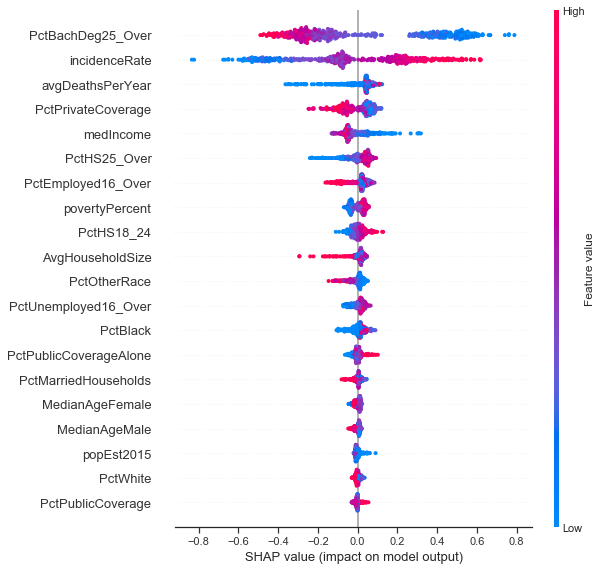

In [74]:
shap.summary_plot(shap_values, features=observations)

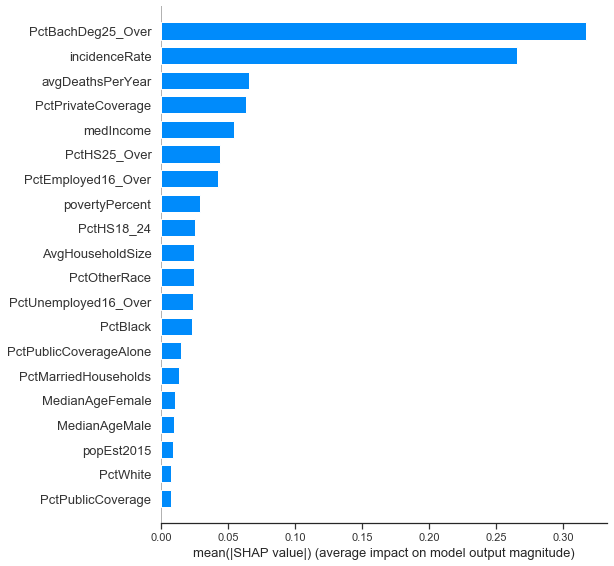

In [265]:
shap.summary_plot(shap_values, xtest, plot_type="bar")

In [ ]:
###################
##### SHAP - SVR
###################

In [223]:
i = 1
observation = xtest.iloc[[i]]
print(f"Observation true label: {ytest.iloc[i]}")
print(f"Observation predicted label:  {rfr_y_hat[i]}")
observation

Observation true label: 0.7594430310209943
Observation predicted label:  0.8783346300811786


,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
840,-0.287786,-0.143692,1.06529,0.019128,-0.123506,0.295606,-0.409435,-0.937764,-0.915697,-0.995439,1.231859,-0.534186,0.245752,0.220272,-0.549792,-1.461019,1.012049,-0.747315,0.473198,-0.138577,-0.412928,-1.871203,-0.07762,-0.013911,0.42005,-1.636396,1.91606,0.103497,-0.400693,-0.281554,0.533403


In [238]:
mod_svr

SVR(C=0.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
%%time
import sklearn
import shap
from sklearn.model_selection import train_test_split

shap.initjs()
svr_explainer = shap.KernelExplainer(mod_svr.predict, xtest)
svr_shap_values = svr_explainer.shap_values(xtest, nsamples=100)

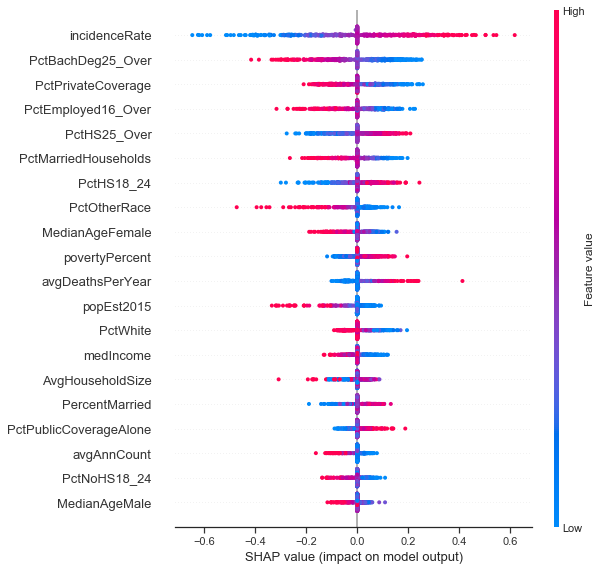

In [250]:
shap.summary_plot(svr_shap_values, xtest)

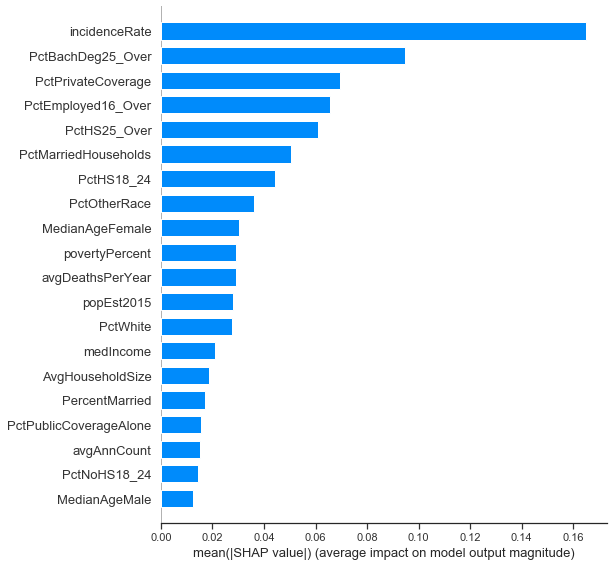

In [268]:
shap.summary_plot(svr_shap_values, xtest, plot_type="bar")